In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install beautifulsoup4 selenium
import bs4 # or from bs4 import BeautifulSoup
from selenium import webdriver
!apt-get update
!apt-get install -y chromium-chromedriver
!pip install selenium
!apt-get update
!apt-get install -y wget unzip
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt-get -f install -y  # Fix broken dependencies
!rm google-chrome-stable_current_amd64.deb

# Install latest ChromeDriver
!wget -N https://chromedriver.storage.googleapis.com/$(wget -qO- https://chromedriver.storage.googleapis.com/LATEST_RELEASE)/chromedriver_linux64.zip
!unzip chromedriver_linux64.zip
!chmod +x chromedriver
!mv chromedriver /usr/bin/chromedriver
!rm /usr/bin/chromedriver
!wget -N https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/134.0.6998.88/linux64/chromedriver-linux64.zip
!unzip chromedriver-linux64.zip
!chmod +x chromedriver-linux64/chromedriver
!mv chromedriver-linux64/chromedriver /usr/bin/chromedriver
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

chrome_options = Options()
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--remote-debugging-port=9222")  # Enable remote debugging
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--headless")  # Remove this line if you want to see the browser


service = Service("/usr/bin/chromedriver")





In [ ]:
class_6_science = ['Food','Materials', 'The World of The Living', 'Moving Things, People and Ideas', 'How Things Work', 'Natural Phenomena', 'Natural Resources', 'Electric current and circuits','Magnets', 'Rain, thunder and lightning','Light','Importance of air','Waste']
class_6_maths = ['Knowing Our Numbers','Playing with Numbers','Whole Numbers', 'Negative Numbers and Integers', 'Fractions','Algebra','Ratio and Proportion', 'Geometry: Basic Geometrical Ideas', 'Understanding Elementary Shapes'
, 'Symmetry', 'Constructions', 'Mensuration: Concept of Perimeter and Introduction to Area', 'Data Handling']
class_7_maths = [
    "Fractions and Decimals",
    "Data Handling",
 "Simple Equations",
"Lines and Angles",
"The Triangles and Its Properties",
"Congruence of Triangles",
"Comparing Quantities",
"Rational Numbers",
"Practical Geometry",
"Perimeter and Area",
"Algebraic Expressions",
"Exponents and Powers",
"Symmetry",
"Visualising Solid Shapes"
]
class_7_science = [
 " Nutrition in Animals",
 "Fibre to Fabric",
 "Heat",
"Acids, Bases and Salts",
"Physical and Chemical Changes",
"Weather, Climate and Adaptations of Animals of Climate",
"Winds, Storms and Cyclones",
"Soil",
"Respiration in Organisms",
"Transportation in Animals and Plants",
"Reproduction in Plants",
"Motion and Time",
"Electric Current and its Effects",
"Light",
"Water: A Precious Resource",
"Forests: Our Lifeline",
 "Wastewater Story"
]


class_8_science = [
    "Crop Production and Management",
    "Microorganisms: Friend and Foe",
    "Coal and Petroleum",
    "Combustion and Flame",
    "Conservation of Plants and Animals",
    "Reproduction in Animals",
    "Reaching the Age of Adolescence",
    "Force and Pressure",
    "Friction",
    "Sound",
    "Chemical Effects of Electric Current",
    "Some Natural Phenomena",
    "Light"
]
class_8_math = [
    "Rational Numbers",
    "Linear Equations in One Variable",
    "Understanding Quadrilaterals",
    "Data Handling",
    "Squares and Square Roots",
    "Cubes and Cube Roots",
    "Comparing Quantities",
    "Algebraic Expressions and Identities",
    "Mensuration",
    "Exponents and Powers",
    "Direct and Inverse Proportions",
    "Factorisation",
    "Introduction to Graphs"
]

Divided Required Content into 3 types to include variety :

1.   Full Chapter based videos
2.   Activity Based Videos
3.   Question - Answers Based






In [ ]:
#Full Chapter
from logging import exception
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options


import re
from datetime import datetime

final_video_details = []
for topic in class_7_science:
  try :
    url = f'https://www.youtube.com/results?search_query=Class+7+Science+{topic}+Full+Chapter+one+shot'

    driver = webdriver.Chrome(service=service, options=chrome_options)
    driver.get(url)
    sleep(10)

    videos = driver.find_elements(By.CSS_SELECTOR, "a#thumbnail")
    video_links = [video.get_attribute("href") for video in videos]



    if len(video_links) > 5:
        video_links = video_links[:5]

    for video in video_links:
        video_data = {}
        try:
            driver = webdriver.Chrome(service=service, options=chrome_options)
            driver.get(video)
            sleep(16)

            video_data['link'] = video
            video_data["topic"] = topic
            video_data["class"] = '7'
            video_data["subject"] = 'Science'

            try:
                # Likes\

                like_element = driver.find_element(By.CLASS_NAME, "ytLikeButtonViewModelHost")
                like_element = like_element.find_element(By.CLASS_NAME, "yt-spec-button-shape-next__button-text-content")
                like_count = like_element.text
                video_data["likes"] = like_count
            except Exception as e:
                print("Like count not found!", e)

            # Views
            view_elem = driver.find_element(By.ID, "info-container")
            view_elem = view_elem.find_elements(By.ID, "info")
            text = view_elem[0].text
            views_match = re.search(r"([\d\.]+[KM]?) views", text)
            views = views_match.group(1) if views_match else None
            video_data["views"] = views

            # Year
            years_ago_match = re.search(r"(\d+) years ago", text)
            years_ago = int(years_ago_match.group(1)) if years_ago_match else 0
            current_year = datetime.now().year
            upload_year = current_year - years_ago if years_ago else None
            video_data["upload_year"] = upload_year

            # Subscriber Count
            sub = driver.find_element(By.ID, "owner-sub-count")
            sub_count = sub.text
            video_data["subscriber_count"] = sub_count

            # Title
            tit = driver.find_element(By.ID, "above-the-fold")
            tit = tit.find_element(By.ID, "title")
            title = tit.text
            video_data["title"] = title

            # Duration
            dur = driver.find_element(By.CLASS_NAME, "ytp-time-duration")
            duration = dur.text
            video_data["duration"] = duration

            # Description
            des = driver.find_element(By.ID, "description-inline-expander")
            des = des.find_element(By.CLASS_NAME, "yt-core-attributed-string--link-inherit-color")
            description = des.text
            video_data["description"] = description

        except Exception as e:
            print("Error processing video", e)

        print(video_data)
        final_video_details.append(video_data)

  except Exception as e :
    print(e)
print(final_video_details)

In [ ]:
#Activity Based
from logging import exception
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options


import re
from datetime import datetime

final_video_details = []
for topic in class_7_science:
  try :
    url = f'https://www.youtube.com/results?search_query=Class+7+Science+{topic}+Activity+Visualization'

    driver = webdriver.Chrome(service=service, options=chrome_options)
    driver.get(url)
    sleep(10)

    videos = driver.find_elements(By.CSS_SELECTOR, "a#thumbnail")
    video_links = [video.get_attribute("href") for video in videos]



    if len(video_links) > 5:
        video_links = video_links[:5]

    for video in video_links:
        video_data = {}
        try:
            driver = webdriver.Chrome(service=service, options=chrome_options)
            driver.get(video)
            sleep(16)

            video_data['link'] = video
            video_data["topic"] = topic
            video_data["class"] = '7'
            video_data["subject"] = 'Science'

            try:
                # Likes\

                like_element = driver.find_element(By.CLASS_NAME, "ytLikeButtonViewModelHost")
                like_element = like_element.find_element(By.CLASS_NAME, "yt-spec-button-shape-next__button-text-content")
                like_count = like_element.text
                video_data["likes"] = like_count
            except Exception as e:
                print("Like count not found!", e)

            # Views
            view_elem = driver.find_element(By.ID, "info-container")
            view_elem = view_elem.find_elements(By.ID, "info")
            text = view_elem[0].text
            views_match = re.search(r"([\d\.]+[KM]?) views", text)
            views = views_match.group(1) if views_match else None
            video_data["views"] = views

            # Year
            years_ago_match = re.search(r"(\d+) years ago", text)
            years_ago = int(years_ago_match.group(1)) if years_ago_match else 0
            current_year = datetime.now().year
            upload_year = current_year - years_ago if years_ago else None
            video_data["upload_year"] = upload_year

            # Subscriber Count
            sub = driver.find_element(By.ID, "owner-sub-count")
            sub_count = sub.text
            video_data["subscriber_count"] = sub_count

            # Title
            tit = driver.find_element(By.ID, "above-the-fold")
            tit = tit.find_element(By.ID, "title")
            title = tit.text
            video_data["title"] = title

            # Duration
            dur = driver.find_element(By.CLASS_NAME, "ytp-time-duration")
            duration = dur.text
            video_data["duration"] = duration

            # Description
            des = driver.find_element(By.ID, "description-inline-expander")
            des = des.find_element(By.CLASS_NAME, "yt-core-attributed-string--link-inherit-color")
            description = des.text
            video_data["description"] = description

        except Exception as e:
            print("Error processing video", e)

        print(video_data)
        final_video_details.append(video_data)

  except Exception as e :
    print(e)
print(final_video_details)

In [ ]:
#Question- Answers
from logging import exception
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options


import re
from datetime import datetime

final_video_details = []
for topic in class_7_science:
  try :
    url = f'https://www.youtube.com/results?search_query=Class+7+Science+{topic}+Question+Answers+Solved'

    driver = webdriver.Chrome(service=service, options=chrome_options)
    driver.get(url)
    sleep(10)

    videos = driver.find_elements(By.CSS_SELECTOR, "a#thumbnail")
    video_links = [video.get_attribute("href") for video in videos]



    if len(video_links) > 5:
        video_links = video_links[:5]

    for video in video_links:
        video_data = {}
        try:
            driver = webdriver.Chrome(service=service, options=chrome_options)
            driver.get(video)
            sleep(16)

            video_data['link'] = video
            video_data["topic"] = topic
            video_data["class"] = '7'
            video_data["subject"] = 'Science'

            try:
                # Likes\

                like_element = driver.find_element(By.CLASS_NAME, "ytLikeButtonViewModelHost")
                like_element = like_element.find_element(By.CLASS_NAME, "yt-spec-button-shape-next__button-text-content")
                like_count = like_element.text
                video_data["likes"] = like_count
            except Exception as e:
                print("Like count not found!", e)

            # Views
            view_elem = driver.find_element(By.ID, "info-container")
            view_elem = view_elem.find_elements(By.ID, "info")
            text = view_elem[0].text
            views_match = re.search(r"([\d\.]+[KM]?) views", text)
            views = views_match.group(1) if views_match else None
            video_data["views"] = views

            # Year
            years_ago_match = re.search(r"(\d+) years ago", text)
            years_ago = int(years_ago_match.group(1)) if years_ago_match else 0
            current_year = datetime.now().year
            upload_year = current_year - years_ago if years_ago else None
            video_data["upload_year"] = upload_year

            # Subscriber Count
            sub = driver.find_element(By.ID, "owner-sub-count")
            sub_count = sub.text
            video_data["subscriber_count"] = sub_count

            # Title
            tit = driver.find_element(By.ID, "above-the-fold")
            tit = tit.find_element(By.ID, "title")
            title = tit.text
            video_data["title"] = title

            # Duration
            dur = driver.find_element(By.CLASS_NAME, "ytp-time-duration")
            duration = dur.text
            video_data["duration"] = duration

            # Description
            des = driver.find_element(By.ID, "description-inline-expander")
            des = des.find_element(By.CLASS_NAME, "yt-core-attributed-string--link-inherit-color")
            description = des.text
            video_data["description"] = description

        except Exception as e:
            print("Error processing video", e)

        print(video_data)
        final_video_details.append(video_data)

  except Exception as e :
    print(e)
print(final_video_details)

In [9]:
def normalize_count(count_str):
    """
    Converts a YouTube-style count like '1.2K', '3M', or '872' into an integer.
    Handles numeric input as well.
    """
    try:
        count_str = str(count_str).strip().upper().replace(",", "")
        if 'K' in count_str:
            return int(float(count_str.replace('K', '')) * 1_000)
        elif 'M' in count_str:
            return int(float(count_str.replace('M', '')) * 1_000_000)
        elif 'B' in count_str:
            return int(float(count_str.replace('B', '')) * 1_000_000_000)
        else:
            return int(float(count_str))  # Handles plain numbers like '872'
    except Exception as e:
        return 0  # or np.nan if you prefer


In [15]:
#Metrics :

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('YT_Database_sorted.xlsx')
df = pd.DataFrame(df)
df['views_int'] = df['views'].apply(normalize_count)
df['likes_int'] = df['likes'].apply(normalize_count)
class_dist = df['class'].value_counts(normalize=True) * 100
print("\nClass-wise Distribution (%):\n", class_dist)


type_dist = df['Type'].value_counts(normalize=True) * 100
print("\nVideo Type Split (%):\n", type_dist)


print("Average Views:", df['views_int'].mean())
print("Average Likes:", df['likes_int'].mean())

min_year = df['upload_year'].min()
max_year = df['upload_year'].max()

print(f"\nTime Span of Uploads: {min_year} to {max_year}")
# Video Type Pie Chart






Class-wise Distribution (%):
 class
6.0    43.741007
7.0    31.223022
8.0    25.035971
Name: proportion, dtype: float64

Video Type Split (%):
 Type
Qna         39.885222
Theory      36.298422
Activity    23.816356
Name: proportion, dtype: float64
Average Views: 637359.1449067432
Average Likes: 6891.084648493544

Time Span of Uploads: 2012.0 to 2023.0


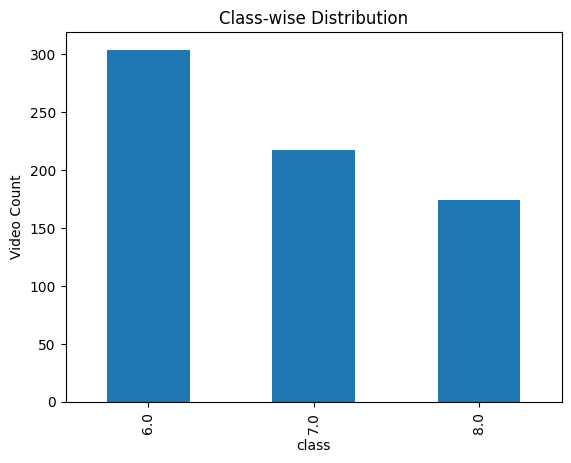

In [17]:

# Class-wise Bar Chart
df['class'].value_counts().sort_index().plot(kind='bar', title="Class-wise Distribution", ylabel="Video Count")
plt.show()

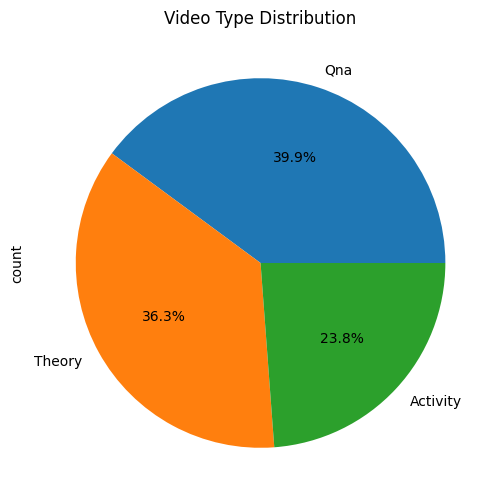

In [18]:
df['Type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), title="Video Type Distribution")
plt.show()